<h1 style="font-size:3rem;color:black;">LAB Work 1</h1>

HON YAO ZHI 22004845 OCC4

# House Pricing Prediction Using Multiple Linear Regression

# Data Analysis

In [1]:
# Import the necessary libraries and modules

import numpy as np
import pandas as pd

In [2]:
# Importing House Pricing.csv

housing = pd.read_csv('House Pricing.csv')

In [3]:
# Overview of the dataset

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Number of rows and column in the dataset

housing.shape

(545, 13)

In [5]:
# Type of values stored in the columns

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# Check for null values

housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

 There are no missing values in the dataframe as all columns have non-null count equal to the total number of rows (545).

In [7]:
# Print out the value counts of each column and get some insights

for i in housing.columns:
    print(f'Column name: [{i}]\n',housing[i].value_counts(),'\n','---'*25,'\n')

Column name: [price]
 3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: price, Length: 219, dtype: int64 
 --------------------------------------------------------------------------- 

Column name: [area]
 6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64 
 --------------------------------------------------------------------------- 

Column name: [bedrooms]
 3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64 
 --------------------------------------------------------------------------- 

Column name: [bathrooms]
 1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64 
 --------------------------------------------------------------------------- 

Column name: [stories]
 2    238
1    227
4     41
3     39
Name: stories,

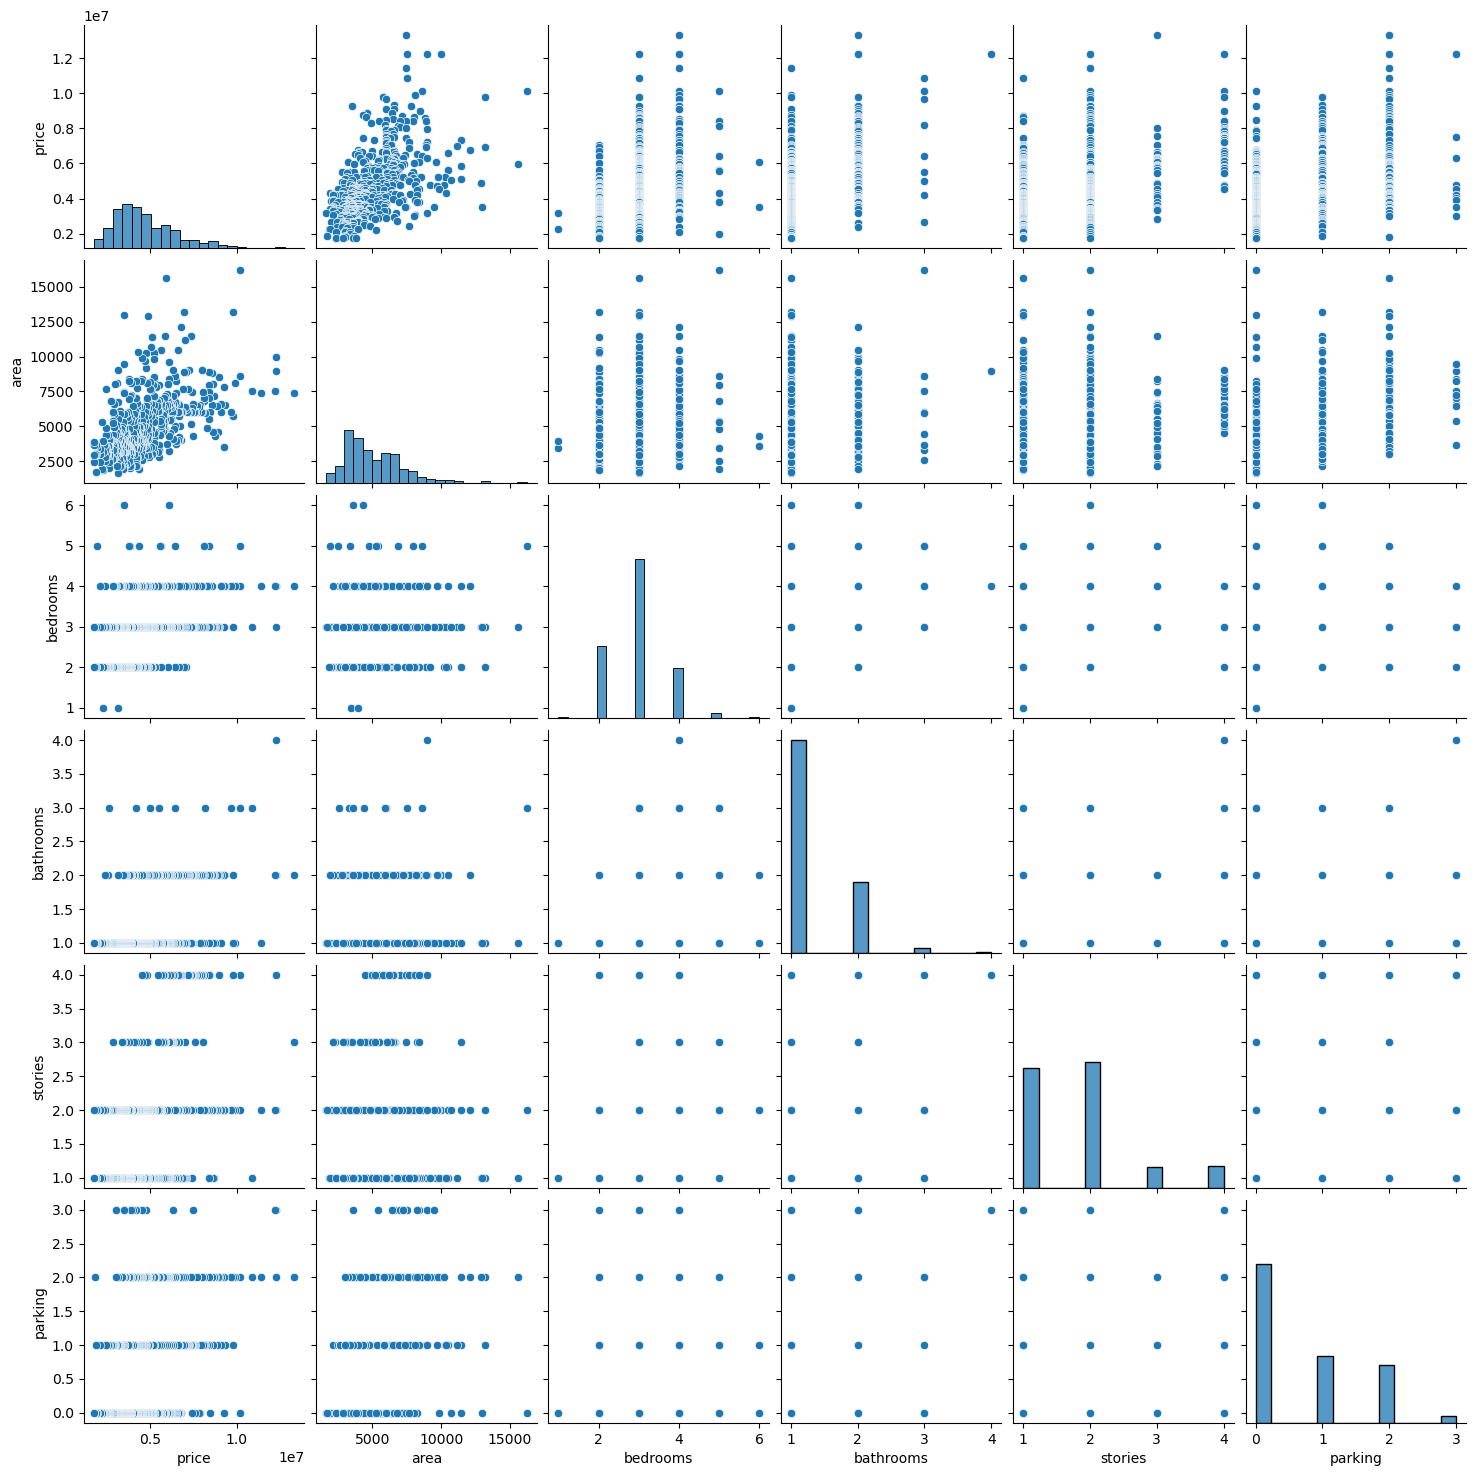

In [8]:
import seaborn as sns

sns.pairplot(housing)

# Data Preprocessing

Binary categorical variables (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea) with values "yes" and "no" 
can be challenging to process in machine learning algorithms.

In [9]:
# Convert Yes as 1 and No as 0 for the variables containing those values

housing['mainroad'] = housing['mainroad'].map({'yes':1,'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes':1,'no':0})
housing['basement'] = housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1,'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes':1,'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1,'no':0})

In [10]:
# To ensure there are changes in the data

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished



"furnishingstatus" variable have three different values (furnished, semi-furnished, unfurnished)

In [11]:
# Separate them as 3 new columns
# Column "furnished" was deleted to avoid multicollinear, it contained redundant information after separation

table = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
table.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
# Adding updated table into the data

housing = pd.concat([housing,table],axis=1)

In [13]:
# To ensure there are changes in the data

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [14]:
# Remove the column "furnishingstatus" from data

housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [15]:
# To ensure there are changes in the data

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Feature Scaling

The "price" variable has a significantly higher value compared to the other variables. 
Feature scaling can be applied in order to address this issue.


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [17]:
# Column to be scaled

var_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [18]:
# Apply the scaled values to dataset

housing[var_to_scale] = scaler.fit_transform(housing[var_to_scale])  
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


The dataset is rescaled and the features have a similar range now.

# Split data into Training and Testing data

In [19]:
# All variables in X except "price"

x = housing.drop('price',axis = 1)
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


In [20]:
# "price" variable in y

y = housing.price
y.head()

0    1.000000
1    0.909091
2    0.909091
3    0.906061
4    0.836364
Name: price, dtype: float64

Split data into
- the training set to train the model 
- the testing set to evaluate the model's performance on unseen data. 

In [21]:
# Importing the required module

from sklearn.model_selection import train_test_split


# 30% of the data is reserved for testing. The random_state ensure the splitting of the data is reproducible

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=108)

In [22]:
# To ensure there are changes in the data

x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
403,0.776220,0.4,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
360,0.164261,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,1,0
158,0.435052,0.4,0.0,0.000000,1,0,0,0,0,0.666667,0,1,0
380,0.195876,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,1,0
56,0.672852,0.6,0.0,0.333333,1,0,1,0,0,0.333333,1,1,0


In [23]:
# Number of rows and column in all data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((381, 13), (164, 13), (381,), (164,))

# Model Development

In [24]:
# Import the statsmodels module

import statsmodels.api as stats_model

Building the first Linear Model

In [25]:
# Adding a constant column to our X_train dataframe
x_train = stats_model.add_constant(x_train)

# Adding a constant variable to test dataframe
x_test = stats_model.add_constant(x_test)

# create a first model
model_1 = stats_model.OLS(y_train,x_train).fit()

In [26]:
x_train.shape

(381, 14)

In [27]:
# Summary of first linear model

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     55.36
Date:                Thu, 04 May 2023   Prob (F-statistic):           3.50e-78
Time:                        22:13:54   Log-Likelihood:                 364.74
No. Observations:                 381   AIC:                            -701.5
Df Residuals:                     367   BIC:                            -646.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0206      0.023     

Trying to build another Linear Model

In [28]:
# Importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

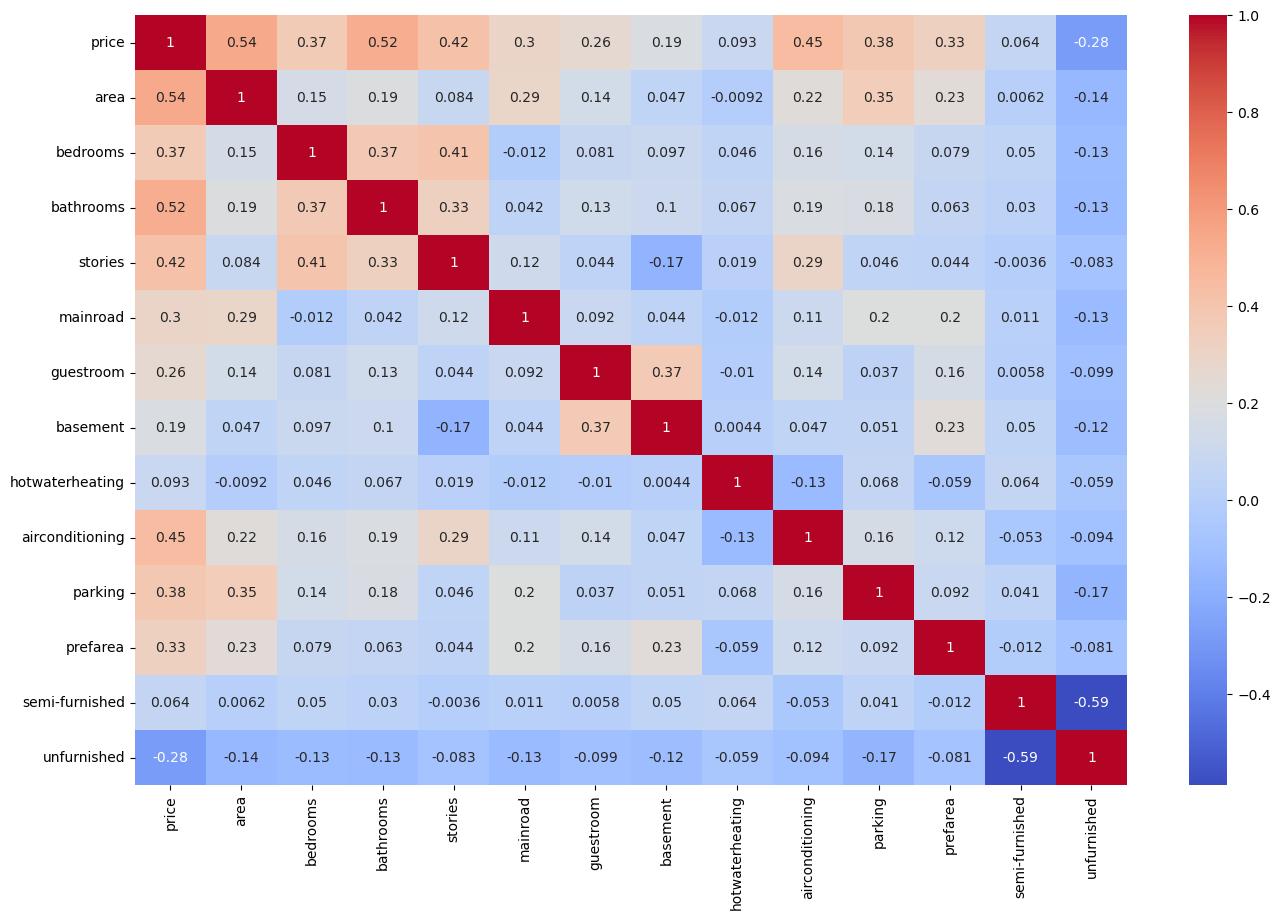

In [29]:
# Magic command in Jupyter Notebook
# Allows the plots to be displayed directly in the notebook.

%matplotlib inline

# Sets the figure size of the heatmap to 16 by 10 inches.

plt.figure(figsize=(16,10))

# Creates the heatmap
sns.heatmap(housing.corr(),annot=True,cmap='coolwarm')

plt.show()

In [30]:
# Import vif module

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [31]:
# vif_scores function

def vif_scores(housing):
    vif = pd.DataFrame()
    vif['cols'] = housing.columns
    vif['VIF'] = [VIF(housing.values,i) for i in range(housing.shape[1])]
    return vif.sort_values(by='VIF',ascending=False)


# Returns the vif DataFrame sorted in descending order by the VIF column.

vif_scores(x)

,cols,VIF
1,bedrooms,7.548951
4,mainroad,5.912370
0,area,4.642181
3,stories,2.748302
11,semi-furnished,2.244298
6,basement,2.013754
9,parking,2.000022
12,unfurnished,1.874527
8,airconditioning,1.762761
2,bathrooms,1.685519


High VIF score indicates that a variable is highly correlated with other variables in the dataset, indicating the presence of multicollinearity.

In [32]:
# Check vif scores after removing some features

score = vif_scores(x.drop(columns=['mainroad', 'semi-furnished','bedrooms']))

score

,cols,VIF
0,area,3.225217
2,stories,2.057223
7,parking,1.931996
4,basement,1.759588
6,airconditioning,1.753370
1,bathrooms,1.608422
8,prefarea,1.475144
3,guestroom,1.470757
9,unfurnished,1.255849
5,hotwaterheating,1.077981


In [33]:
# Updating features

x_2 = housing[[column for column in score.cols]]


# Putting corresponding variable to y ie. price

y_2 = housing.price

In [34]:
# train test split again on X and y

x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x_2,y_2,test_size=0.3,random_state=108)

In [35]:
# Adding a constant column to dataframe
x_train_2 = stats_model.add_constant(x_train_2) 

# Adding a constant variable to test dataframe
x_test_2 = stats_model.add_constant(x_test_2)

# Create a second fitted model
model_2 = stats_model.OLS(y_train_2,x_train_2).fit()

# Printing model_2 summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     70.06
Date:                Thu, 04 May 2023   Prob (F-statistic):           4.14e-79
Time:                        22:13:55   Log-Likelihood:                 360.34
No. Observations:                 381   AIC:                            -698.7
Df Residuals:                     370   BIC:                            -655.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0567      0.013     

# Model Selection

Model 1

In [36]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     55.36
Date:                Thu, 04 May 2023   Prob (F-statistic):           3.50e-78
Time:                        22:13:55   Log-Likelihood:                 364.74
No. Observations:                 381   AIC:                            -701.5
Df Residuals:                     367   BIC:                            -646.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0206      0.023     

In [37]:
# Predictions of model 1

y_pred = model_1.predict(x_test)

y_pred.head()

350    0.253595
433    0.154932
477    0.102846
46     0.471253
294    0.216562
dtype: float64

In [38]:
# The R-squared value is a general measure of model fit

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.7126423407974328


In [39]:
from sklearn import metrics

# RMSE (Root Mean Squared Error) 
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')

# MSE (Mean Squared Error)
print(f'MSE : {metrics.mean_squared_error(y_test,y_pred)}')

# MAE (Mean Absolute Error)
print(f'MAE : {metrics.mean_absolute_error(y_test,y_pred)}')

RMSE : 0.0890966046987814
MSE : 0.007938204968850917
MAE : 0.06641603301754426


Model 2

In [40]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     70.06
Date:                Thu, 04 May 2023   Prob (F-statistic):           4.14e-79
Time:                        22:13:55   Log-Likelihood:                 360.34
No. Observations:                 381   AIC:                            -698.7
Df Residuals:                     370   BIC:                            -655.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0567      0.013     

In [41]:
# Predictions of model 2

y_pred_2 = model_2.predict(x_test_2)

y_pred_2.head()

350    0.265142
433    0.170183
477    0.099524
46     0.475558
294    0.233267
dtype: float64

In [42]:
# The R-squared value is a general measure of model fit

from sklearn.metrics import r2_score

r2 = r2_score(y_test_2, y_pred_2)

print(r2)

0.7124938942260957


In [43]:
# RMSE (Root Mean Squared Error) 
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test_2,y_pred_2))}')

# MSE (Mean Squared Error)
print(f'MSE : {metrics.mean_squared_error(y_test_2,y_pred_2)}')

# MAE (Mean Absolute Error)
print(f'MAE : {metrics.mean_absolute_error(y_test_2,y_pred_2)}')

RMSE : 0.08911961500907155
MSE : 0.00794230577936513
MAE : 0.06666824265645079


First model may appear to be better as it has a higher number of features, a slightly higher R-squared value and lower RMSE value.

# Model Evaluation (Model 1)

In [44]:
# Hyperparameter tuning for OLS
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Fit the best estimator on the entire training set
best_estimator = grid_search.best_estimator_
best_estimator.fit(x_train, y_train)

# Predict on the test set
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best hyperparameters:  {'alpha': 0.1}
Mean Squared Error: 0.007942269640439408
R-squared: 0.7124952024308022


In [45]:
# Import metrics module

from sklearn import metrics

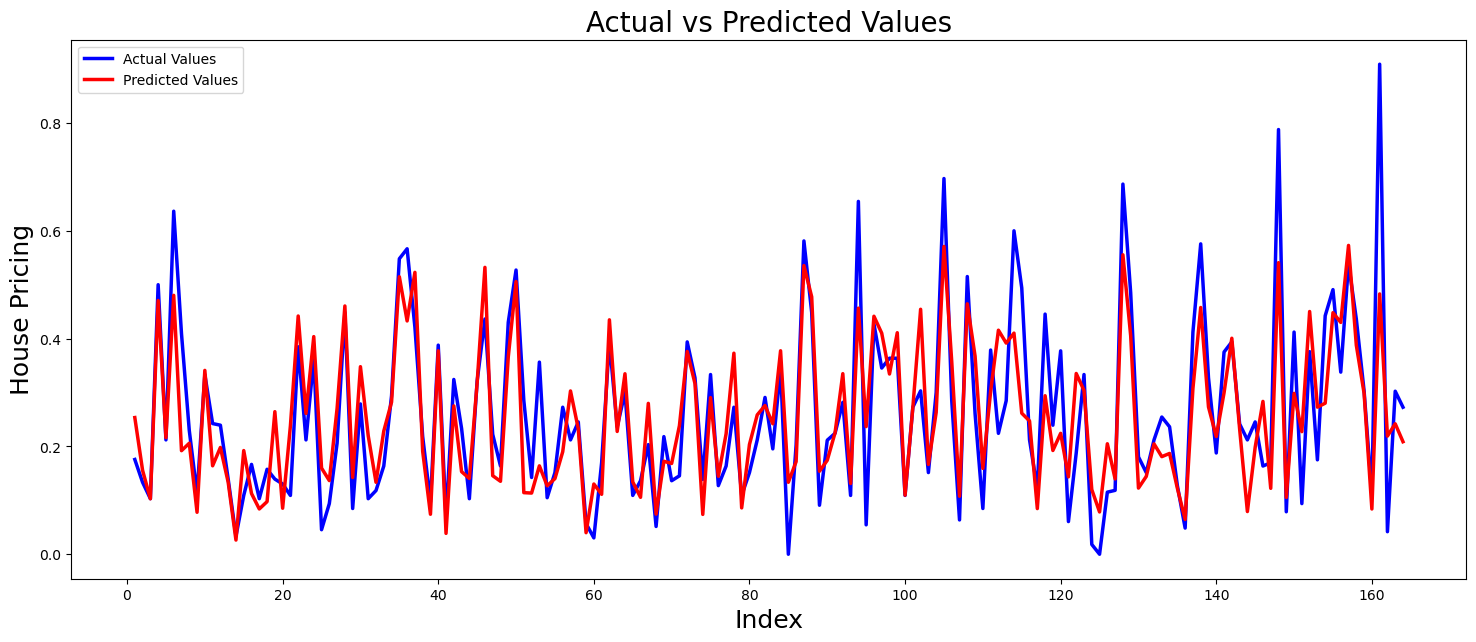

In [46]:
# Actual values vs Predicted values graph 

plt.figure(figsize=(18,7))
count = [i for i in range(1,165,1)]
plt.plot(count,y_test,c='blue',linewidth=2.5,linestyle='-',label='Actual Values')  # taking y_test (Actual) to plot
plt.plot(count,y_pred,c='red',linewidth=2.5,linestyle='-',label='Predicted Values') # taking y_pred to compare with y_test (Predicted) to plot

# Plot heading

plt.legend(loc=0)
plt.title('Actual vs Predicted Values',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('House Pricing',fontsize=18)

plt.show()

Text(0, 0.5, 'y_pred')

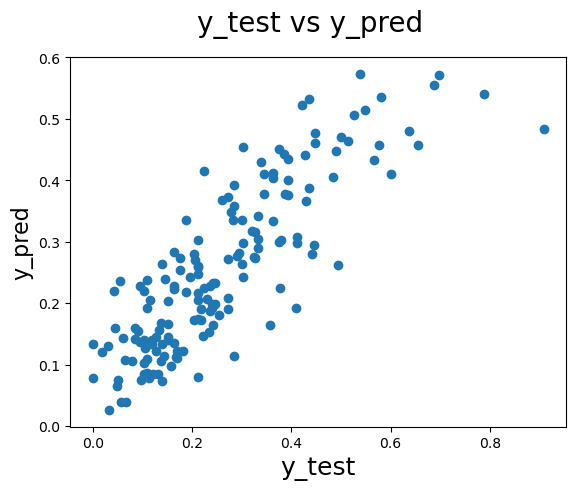

In [47]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label